"Image Classification Using Deep Learning in TensorFlow"

In [ ]:
import tensorflow as tf
print("Version-TensorFlow",tf.__version__)

Version-TensorFlow 2.18.0


Loading the dataset


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

Building a ML model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),  # Input shape matches grayscale
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)  # 10 output units for 10 classes
])




Converting CIFAR-10 to grayscale


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train) / 255.0
x_test_gray = tf.image.rgb_to_grayscale(x_test) / 255.0
x_train_gray = tf.cast(x_train_gray, tf.float32)
x_test_gray = tf.cast(x_test_gray, tf.float32)
print(x_train_gray.shape, x_train_gray.dtype)
print(y_train.shape, y_train.dtype)
print(x_test_gray.shape, x_test_gray.dtype)
print(y_test.shape, y_test.dtype)



(50000, 32, 32, 1) <dtype: 'float32'>
(50000,) <dtype: 'uint8'>
(10000, 32, 32, 1) <dtype: 'float32'>
(10000,) <dtype: 'uint8'>


Reshaping the model


In [ ]:
y_train = tf.squeeze(y_train)
y_test = tf.squeeze(y_test)

Shape of the grayscale

In [ ]:
print(x_train_gray.shape)
print(x_test_gray.shape)


(50000, 32, 32, 1)
(10000, 32, 32, 1)


Converting y_train tensor into NumPy array

In [ ]:
print(y_train.numpy().min(), y_train.numpy().max())


0 9


Verify the model Input Shape

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Making predictions on grayscale images

In [ ]:
predictions = model(x_train[:1]).numpy()
print(predictions)

[[-2.6451666  -0.34161583 -0.09061021 -0.62127703  0.67771226  0.4123864
  -0.18284336 -0.29456988 -0.24613163  1.1564958 ]]


Softmax to get the probability

In [ ]:
probabilities=tf.nn.softmax(predictions).numpy()
print(probabilities)

[[0.00631033 0.06316422 0.08118606 0.04775466 0.175049   0.1342549
  0.07403297 0.06620685 0.06949273 0.28254834]]


Loss Function for training

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn)

<LossFunctionWrapper(<function sparse_categorical_crossentropy at 0x7deb71363e20>, kwargs={'from_logits': True, 'ignore_class': None})>


Calculating the loss function for the first sample


In [ ]:
loss_fn(y_train[:1],predictions).numpy()

2.6032448

Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train and Evaluate the Model

In [ ]:
history = model.fit(x_train_gray, y_train, epochs=5, validation_data=(x_test_gray, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1877 - loss: 2.1805 - val_accuracy: 0.2672 - val_loss: 2.0130
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2551 - loss: 2.0426 - val_accuracy: 0.3068 - val_loss: 1.9423
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2752 - loss: 1.9962 - val_accuracy: 0.3021 - val_loss: 1.9376
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2804 - loss: 1.9786 - val_accuracy: 0.3140 - val_loss: 1.9079
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2849 - loss: 1.9688 - val_accuracy: 0.3118 - val_loss: 1.9194


In [ ]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Activation('softmax')
])


In [ ]:
predictions = probability_model(x_test_gray[:5])
print(predictions.numpy())

[[0.09992313 0.04558177 0.15145798 0.08098628 0.188971   0.08368049
  0.13183485 0.11199293 0.07523333 0.03033829]
 [0.03393965 0.28817746 0.00239513 0.00610532 0.00229378 0.00290835
  0.00431013 0.00344998 0.21662061 0.43979958]
 [0.16401573 0.12498985 0.01436448 0.01704173 0.01032054 0.01271401
  0.00467752 0.03016594 0.44969225 0.17201798]
 [0.21952064 0.08340652 0.07730515 0.0507812  0.03793321 0.05488322
  0.03343387 0.03848226 0.3392145  0.06503947]
 [0.07153773 0.05420207 0.12061989 0.107943   0.21845691 0.0980196
  0.15957592 0.09774826 0.04503969 0.02685689]]


Visualizing the prediction


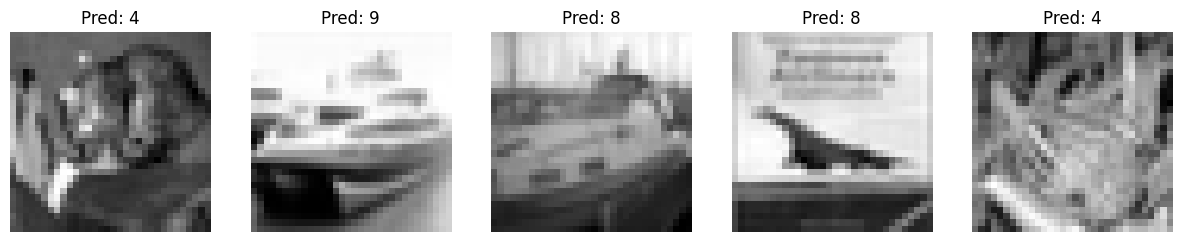

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
predictions = probability_model(x_test_gray[:5])  # Or use Option 2's probabilities
predicted_classes = np.argmax(predictions, axis=1)

# Plot images with their predicted labels
num_images = 5
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test_gray[i].numpy().squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}")
    plt.axis('off')
plt.show()


Analysing Misclassification using Confusion Matrix

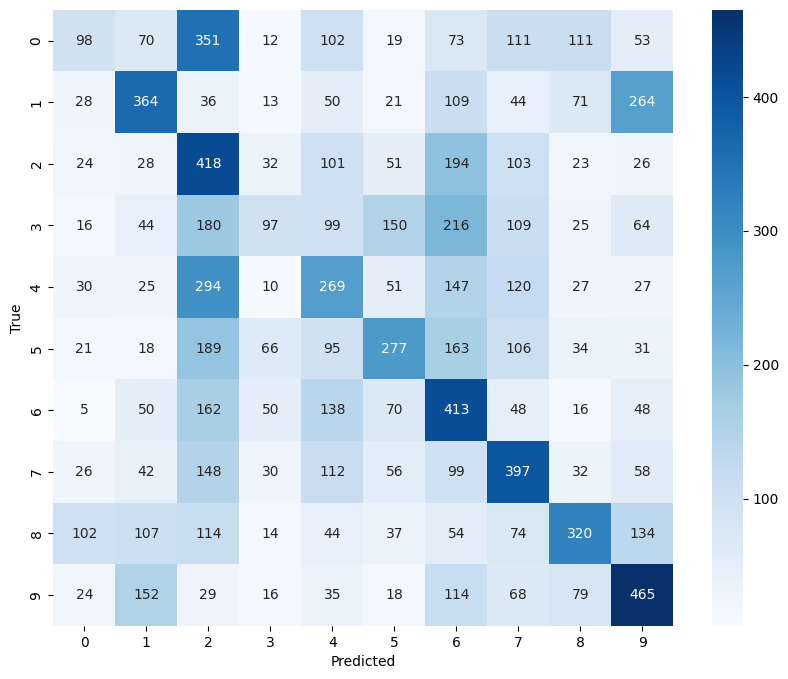

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted_classes = np.argmax(probability_model(x_test_gray), axis=1)
cm = confusion_matrix(y_test.numpy().flatten(), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Accuracy and Loss Evaluation

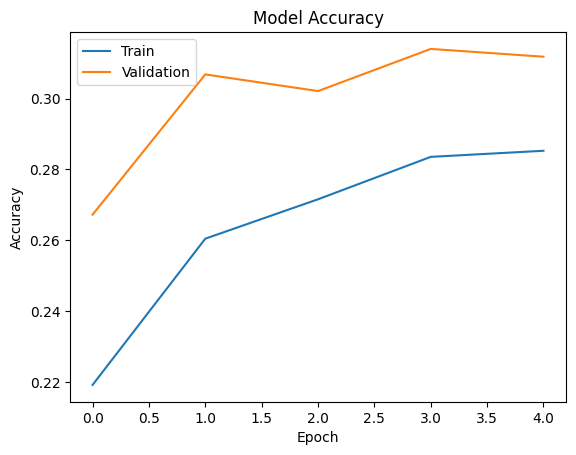

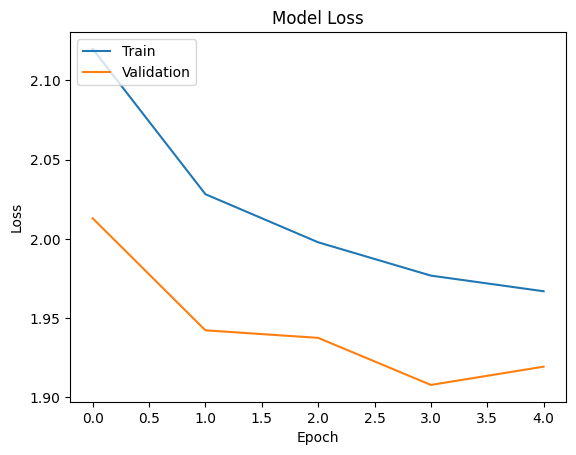

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.numpy().flatten(), predicted_classes))


              precision    recall  f1-score   support

           0       0.26      0.10      0.14      1000
           1       0.40      0.36      0.38      1000
           2       0.22      0.42      0.29      1000
           3       0.29      0.10      0.14      1000
           4       0.26      0.27      0.26      1000
           5       0.37      0.28      0.32      1000
           6       0.26      0.41      0.32      1000
           7       0.34      0.40      0.36      1000
           8       0.43      0.32      0.37      1000
           9       0.40      0.47      0.43      1000

    accuracy                           0.31     10000
   macro avg       0.32      0.31      0.30     10000
weighted avg       0.32      0.31      0.30     10000

